In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import time
import scipy
# import scipy
import matplotlib as mlt
import os
import json
import csv

In [2]:
spotify= pd.read_csv('SpotifyFeatures.csv')
spotify.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [3]:
spotify.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [4]:
spotify.isnull().sum(axis = 0)

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [5]:
spotify.describe()

popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000          0.000000       0.097400     -11.771000   
50%         0.605000          0.000044       0.128000      -7.762000   
75%         0.787000          0.035800       0.264000      -5.501000   
max         0.999000          0.999000       1.000000       3.744000   

         speechiness          tempo        valence  
count  232725.000000  232725.000000  232725.000000  
mean        0.120765     117.666585       0.454917  
std         0.185518      30.898907       0.260065  
min         0.022200      30.379000       0.000000  
25%         0.036700      92.959000       0.237000  
50%         0.050100     115.778000       0.444000  
75%         0.105000     139.054000       0.660000  
max         0.967000     242.903000       1.000000

In [6]:
spotify['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [7]:
spotify['genre'].unique().tolist() 

['Movie',
 'R&B',
 'A Capella',
 'Alternative',
 'Country',
 'Dance',
 'Electronic',
 'Anime',
 'Folk',
 'Blues',
 'Opera',
 'Hip-Hop',
 "Children's Music",
 'Children’s Music',
 'Rap',
 'Indie',
 'Classical',
 'Pop',
 'Reggae',
 'Reggaeton',
 'Jazz',
 'Rock',
 'Ska',
 'Comedy',
 'Soul',
 'Soundtrack',
 'World']

In [8]:
spotify['genre'] = spotify['genre'].replace(['Children’s Music'],"Children's Music")
spotify['genre'] = spotify['genre'].replace(['Reggaeton'],"Reggae")

In [9]:
spotify['genre'].unique().tolist()

['Movie',
 'R&B',
 'A Capella',
 'Alternative',
 'Country',
 'Dance',
 'Electronic',
 'Anime',
 'Folk',
 'Blues',
 'Opera',
 'Hip-Hop',
 "Children's Music",
 'Rap',
 'Indie',
 'Classical',
 'Pop',
 'Reggae',
 'Jazz',
 'Rock',
 'Ska',
 'Comedy',
 'Soul',
 'Soundtrack',
 'World']

In [10]:
# check if there's duplicated 
spotify.duplicated(keep='first').sum()

0

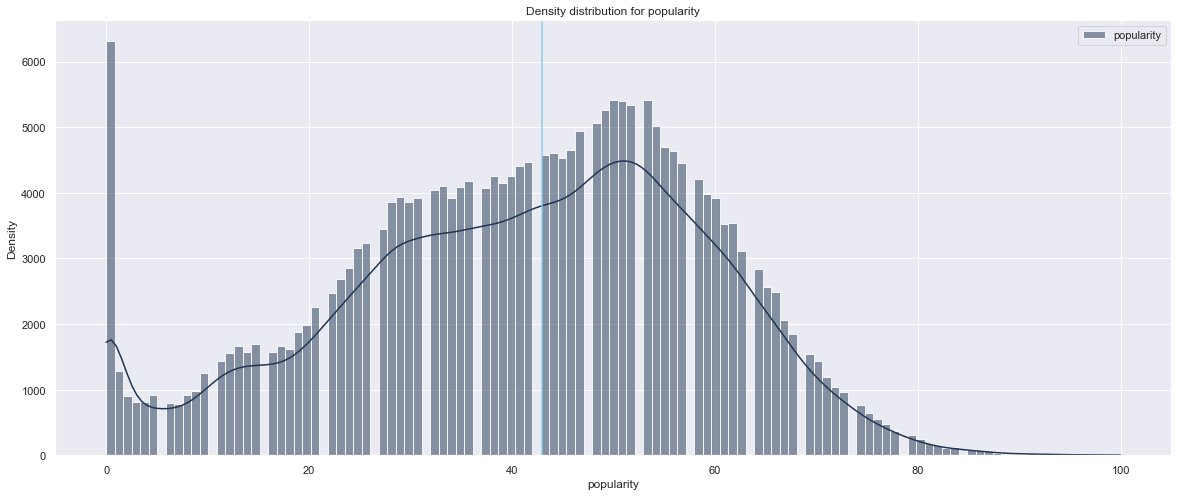

In [11]:
sns.set(rc={'figure.figsize':(20,8)})
sns.histplot(data=spotify, x="popularity", color="#1F3552", label="popularity", kde=True)
plt.axvline(x=spotify['popularity'].median(),
            color='skyblue')


plt.ylabel('Density')
plt.title('Density distribution for popularity')

plt.legend() 
plt.show()


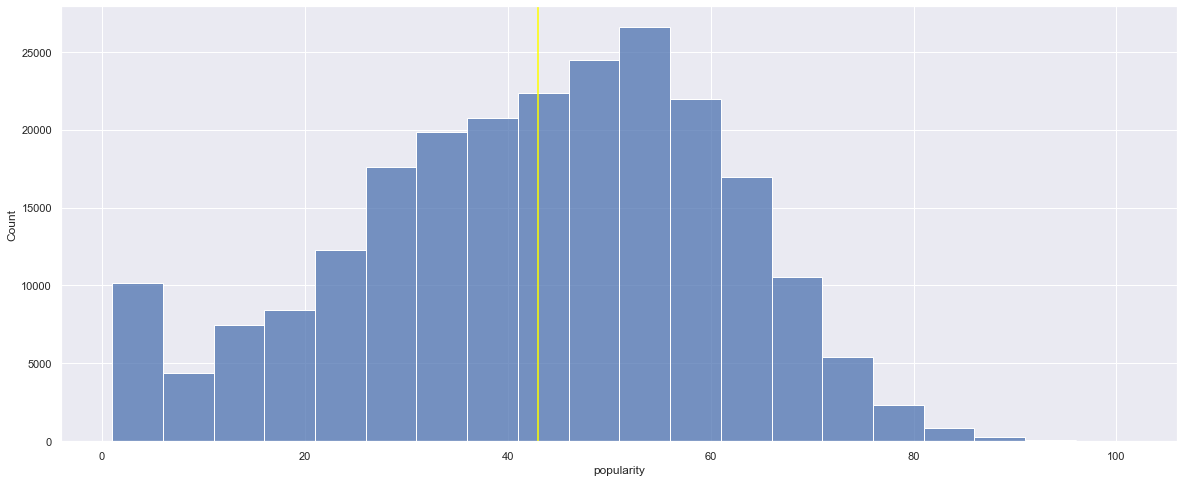

In [12]:
sns.histplot(spotify['popularity']+1,bins=20)
plt.axvline(x=spotify['popularity'].median(),
            color='yellow')

In [13]:
import plotnine

from plotnine import *
from plotnine import data

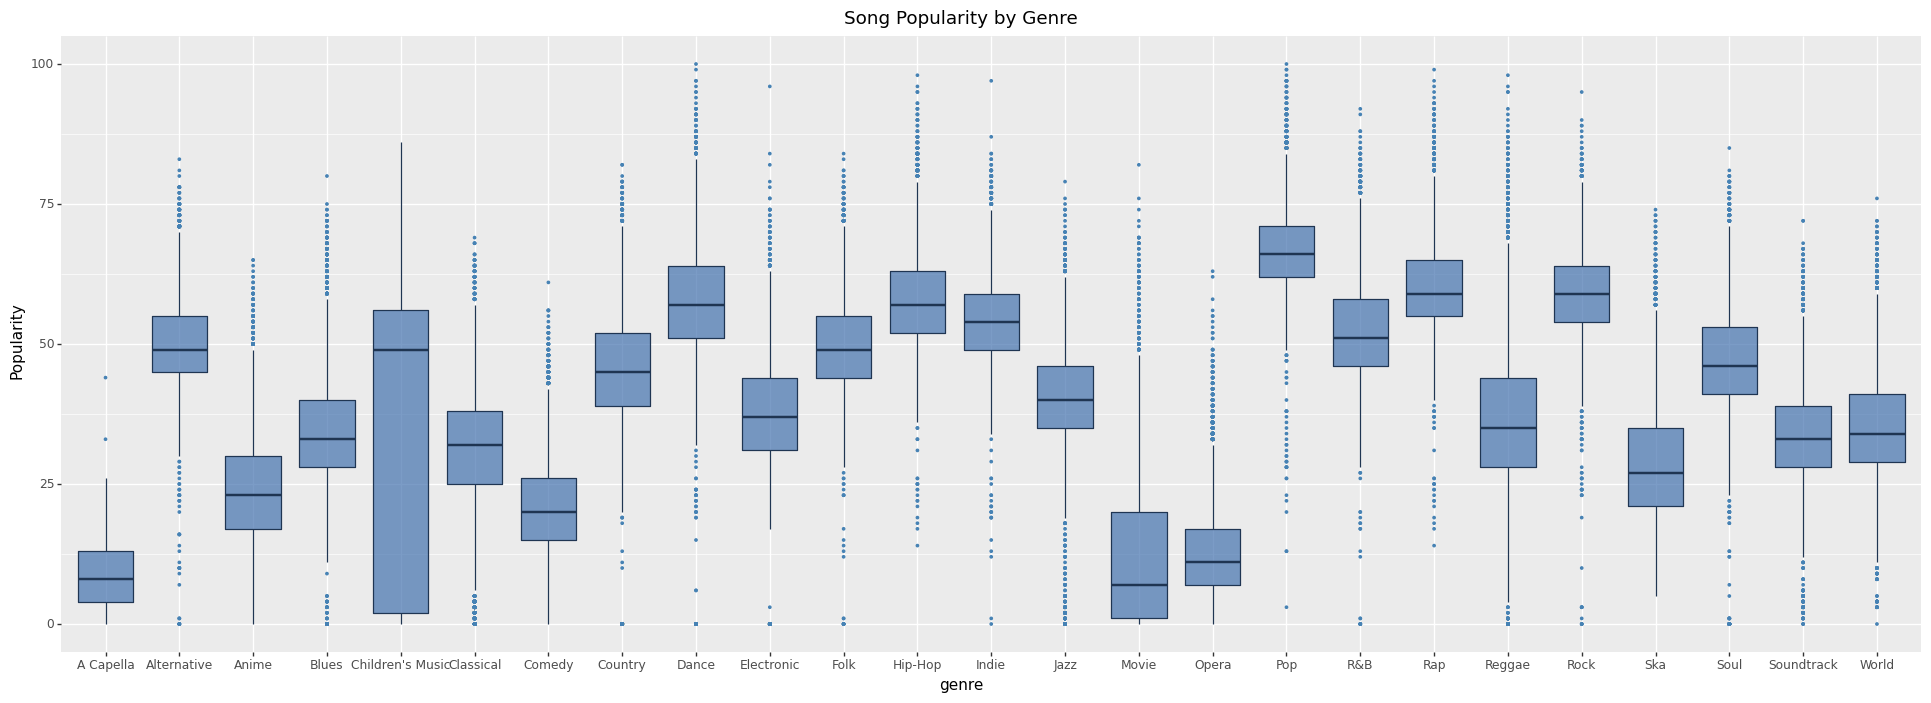

<ggplot: (-9223363269888252942)>

In [14]:
p10 = (
    ggplot(spotify, aes("genre", "popularity"))
    + geom_boxplot(
        colour="#1F3552",
        fill="#4271AE",
        alpha=0.7,
        outlier_shape=".",
        outlier_colour="steelblue",
    )
    + xlab("genre")
    + ylab("Popularity")
    + scale_y_continuous(limits=[0, 100])
    + ggtitle("Song Popularity by Genre")
    + theme(figure_size=(24, 8))
)
p10

[Text(0, 0, 'Movie'),
 Text(0, 0, 'R&B'),
 Text(0, 0, 'A Capella'),
 Text(0, 0, 'Alternative'),
 Text(0, 0, 'Country'),
 Text(0, 0, 'Dance'),
 Text(0, 0, 'Electronic'),
 Text(0, 0, 'Anime'),
 Text(0, 0, 'Folk'),
 Text(0, 0, 'Blues'),
 Text(0, 0, 'Opera'),
 Text(0, 0, 'Hip-Hop'),
 Text(0, 0, "Children's Music"),
 Text(0, 0, 'Rap'),
 Text(0, 0, 'Indie'),
 Text(0, 0, 'Classical'),
 Text(0, 0, 'Pop'),
 Text(0, 0, 'Reggae'),
 Text(0, 0, 'Jazz'),
 Text(0, 0, 'Rock'),
 Text(0, 0, 'Ska'),
 Text(0, 0, 'Comedy'),
 Text(0, 0, 'Soul'),
 Text(0, 0, 'Soundtrack'),
 Text(0, 0, 'World')]

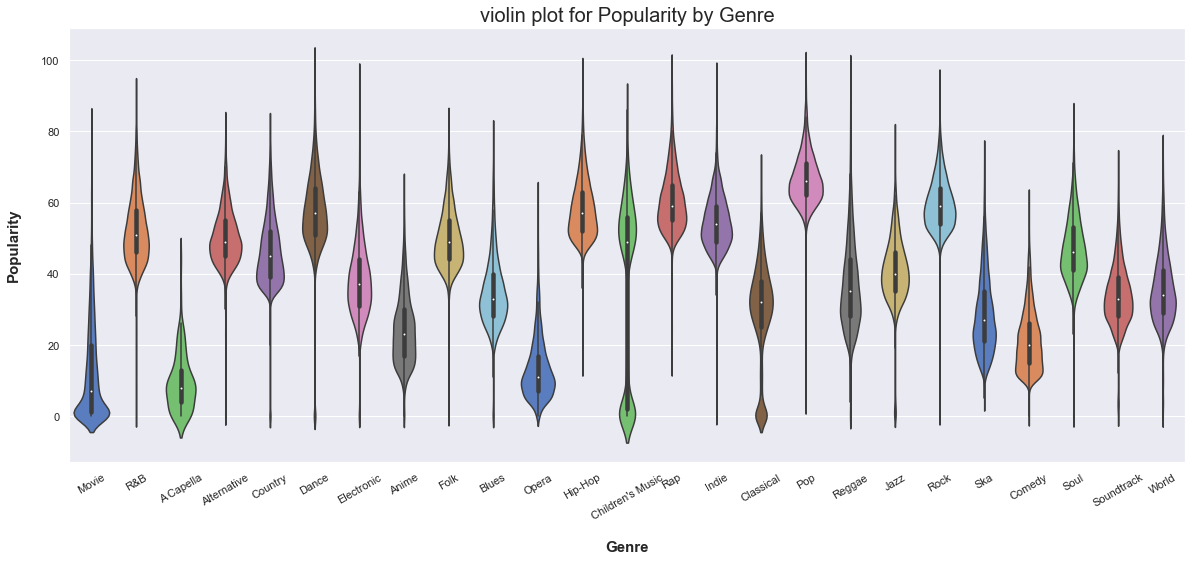

In [15]:
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.violinplot(x="genre", y="popularity",
                    data=spotify, palette="muted")

ax.set_title("violin plot for Popularity by Genre", size=20)
ax.set_xlabel("Genre", labelpad=20, weight='bold', size=15)
ax.set_ylabel("Popularity", labelpad=20, weight='bold', size=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

In [16]:
sp1 = spotify.groupby("genre").mean()
sp1.sort_values(by='popularity', ascending=False, inplace=True)

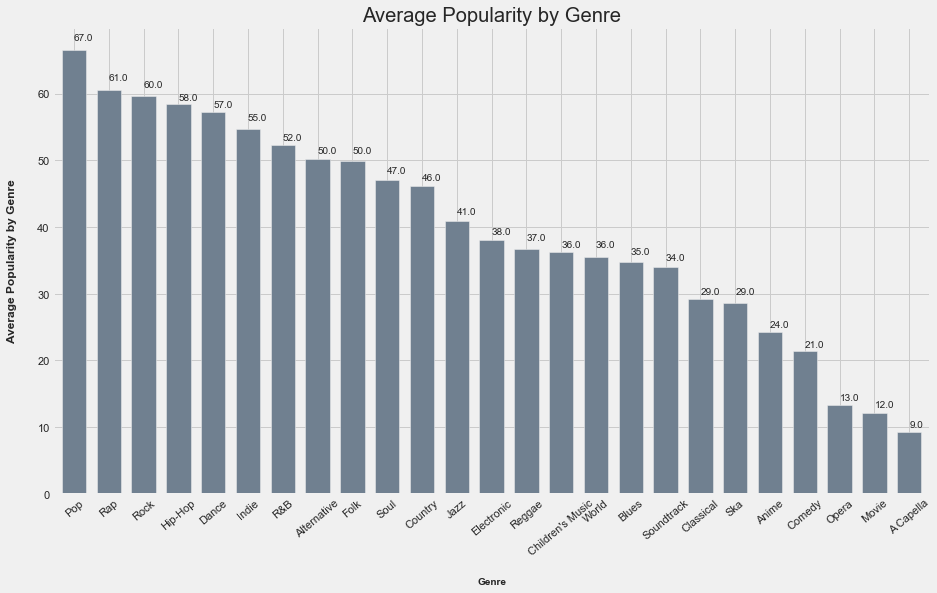

In [17]:
mlt.style.use('fivethirtyeight') 

# Average Popularity
ax=sp1['popularity'].plot(kind='bar', figsize=(14, 8), color='slategrey', zorder=2, width=0.7)

ax.set_title("Average Popularity by Genre")
ax.set_xlabel("Genre", labelpad=20, weight='bold', size=10)
ax.set_ylabel("Average Popularity by Genre", labelpad=20, weight='bold', size=12)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40)

for index,data in enumerate(sp1.popularity.round(0).tolist()):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f937b51a4e0>,
      dtype=object)

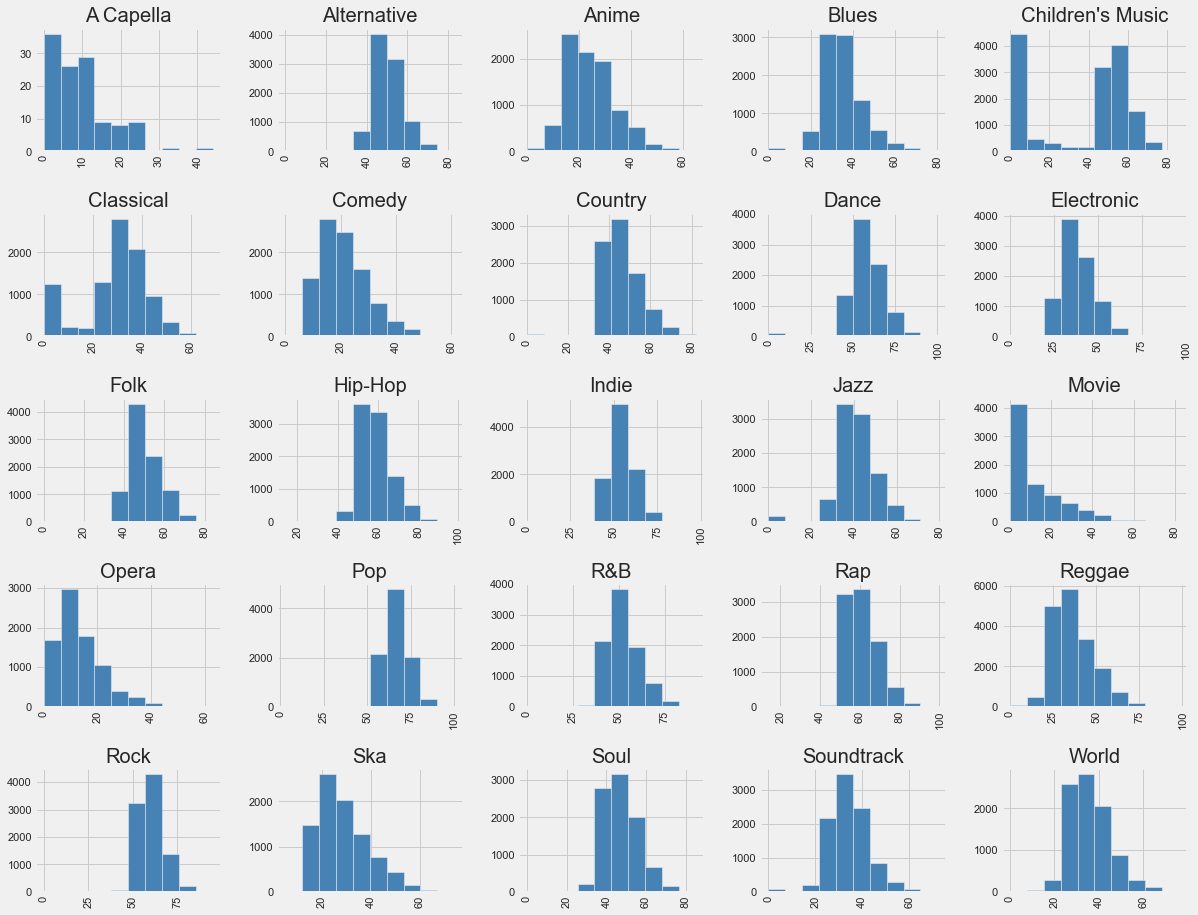

In [18]:
spotify.hist(column='popularity', by='genre', color='steelblue',  figsize=[20, 16])

In [19]:
pop=spotify[spotify['genre']=='Pop']
sp2 = pop.groupby("artist_name").mean()
sp2.sort_values(by='popularity', ascending=False, inplace=True)

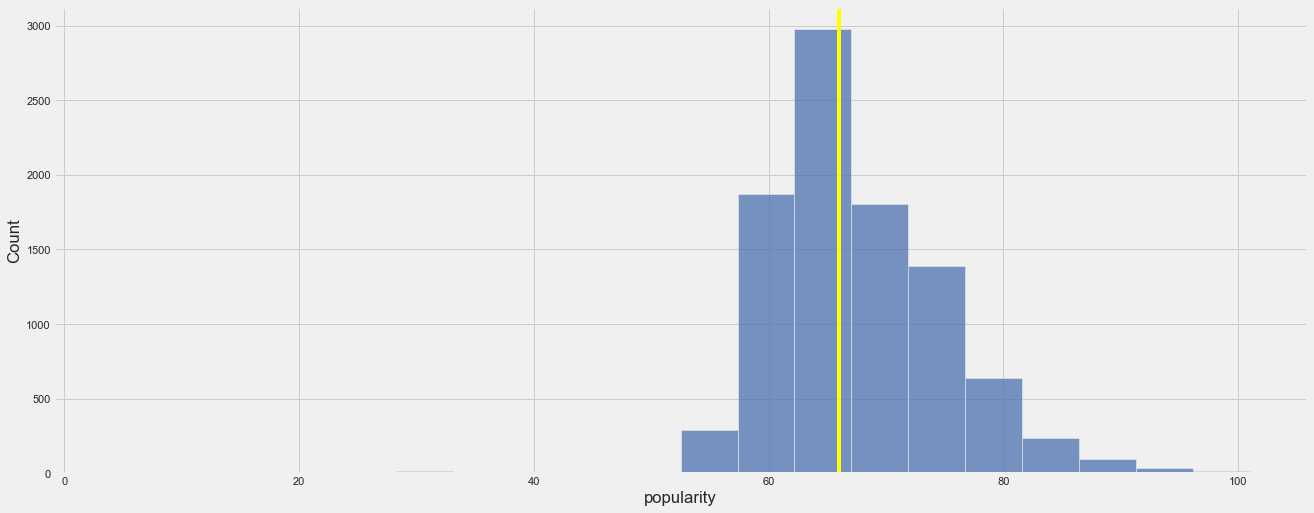

In [20]:
sns.histplot(pop['popularity']+1,bins=20)
plt.axvline(x=pop['popularity'].median(),
            color='yellow')

## Question 2

#### turn categorical data into numberic

In [21]:
m=spotify['popularity'].median()
spotify['popularity_level']=spotify['popularity'].apply(lambda x: 'popular' if x >= m else 'not popular')
spotify['popularity_level']

0         not popular
1         not popular
2         not popular
3         not popular
4         not popular
             ...     
232720    not popular
232721    not popular
232722        popular
232723        popular
232724    not popular
Name: popularity_level, Length: 232725, dtype: object

Text(0.5, 1.0, 'Popularity Based on Time Signature')

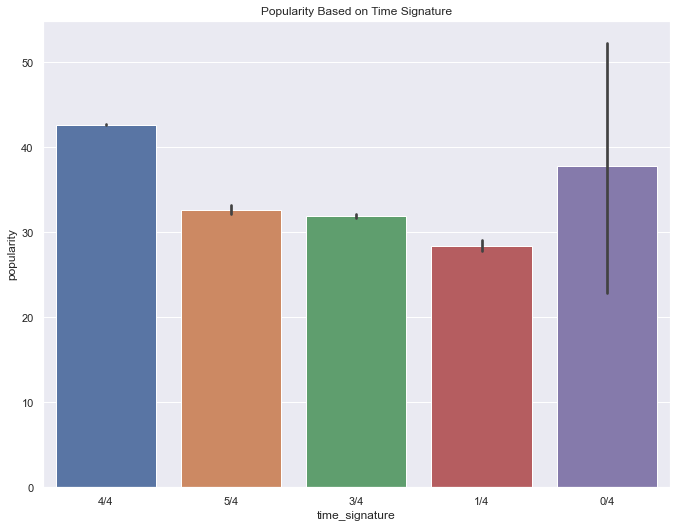

In [22]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x = 'time_signature', y = 'popularity', data = spotify)
plt.title('Popularity Based on Time Signature')


Text(0.5, 1.0, 'Popularity Based on Key')

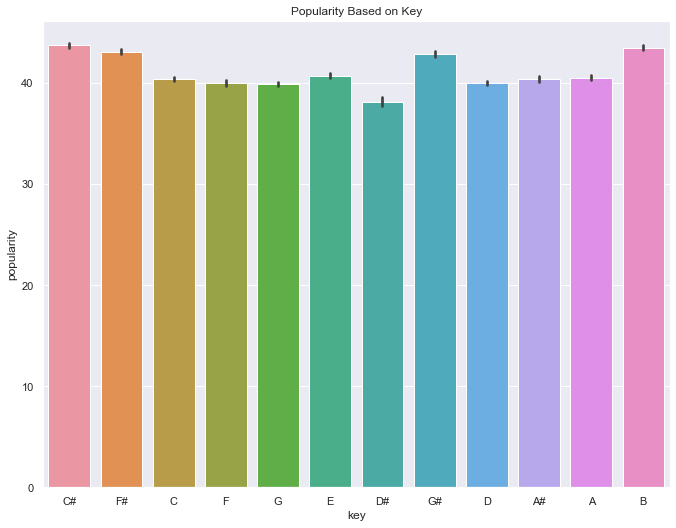

In [23]:
sns.barplot(x = 'key', y = 'popularity', data = spotify)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Mode')

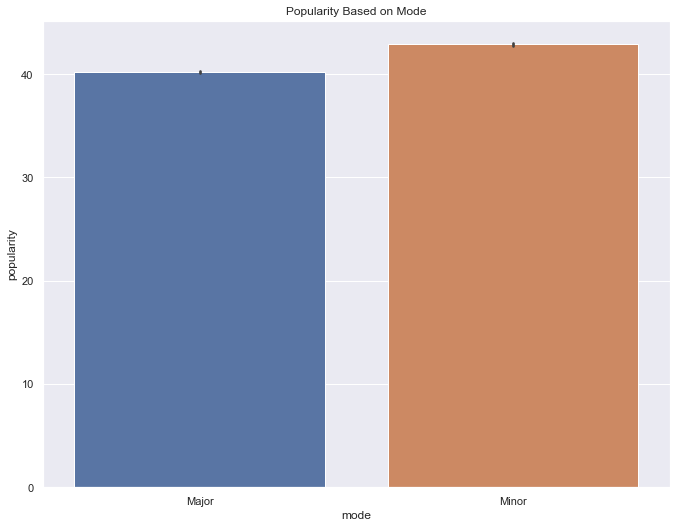

In [24]:
sns.barplot(x = 'mode', y = 'popularity', data = spotify)
plt.title('Popularity Based on Mode')

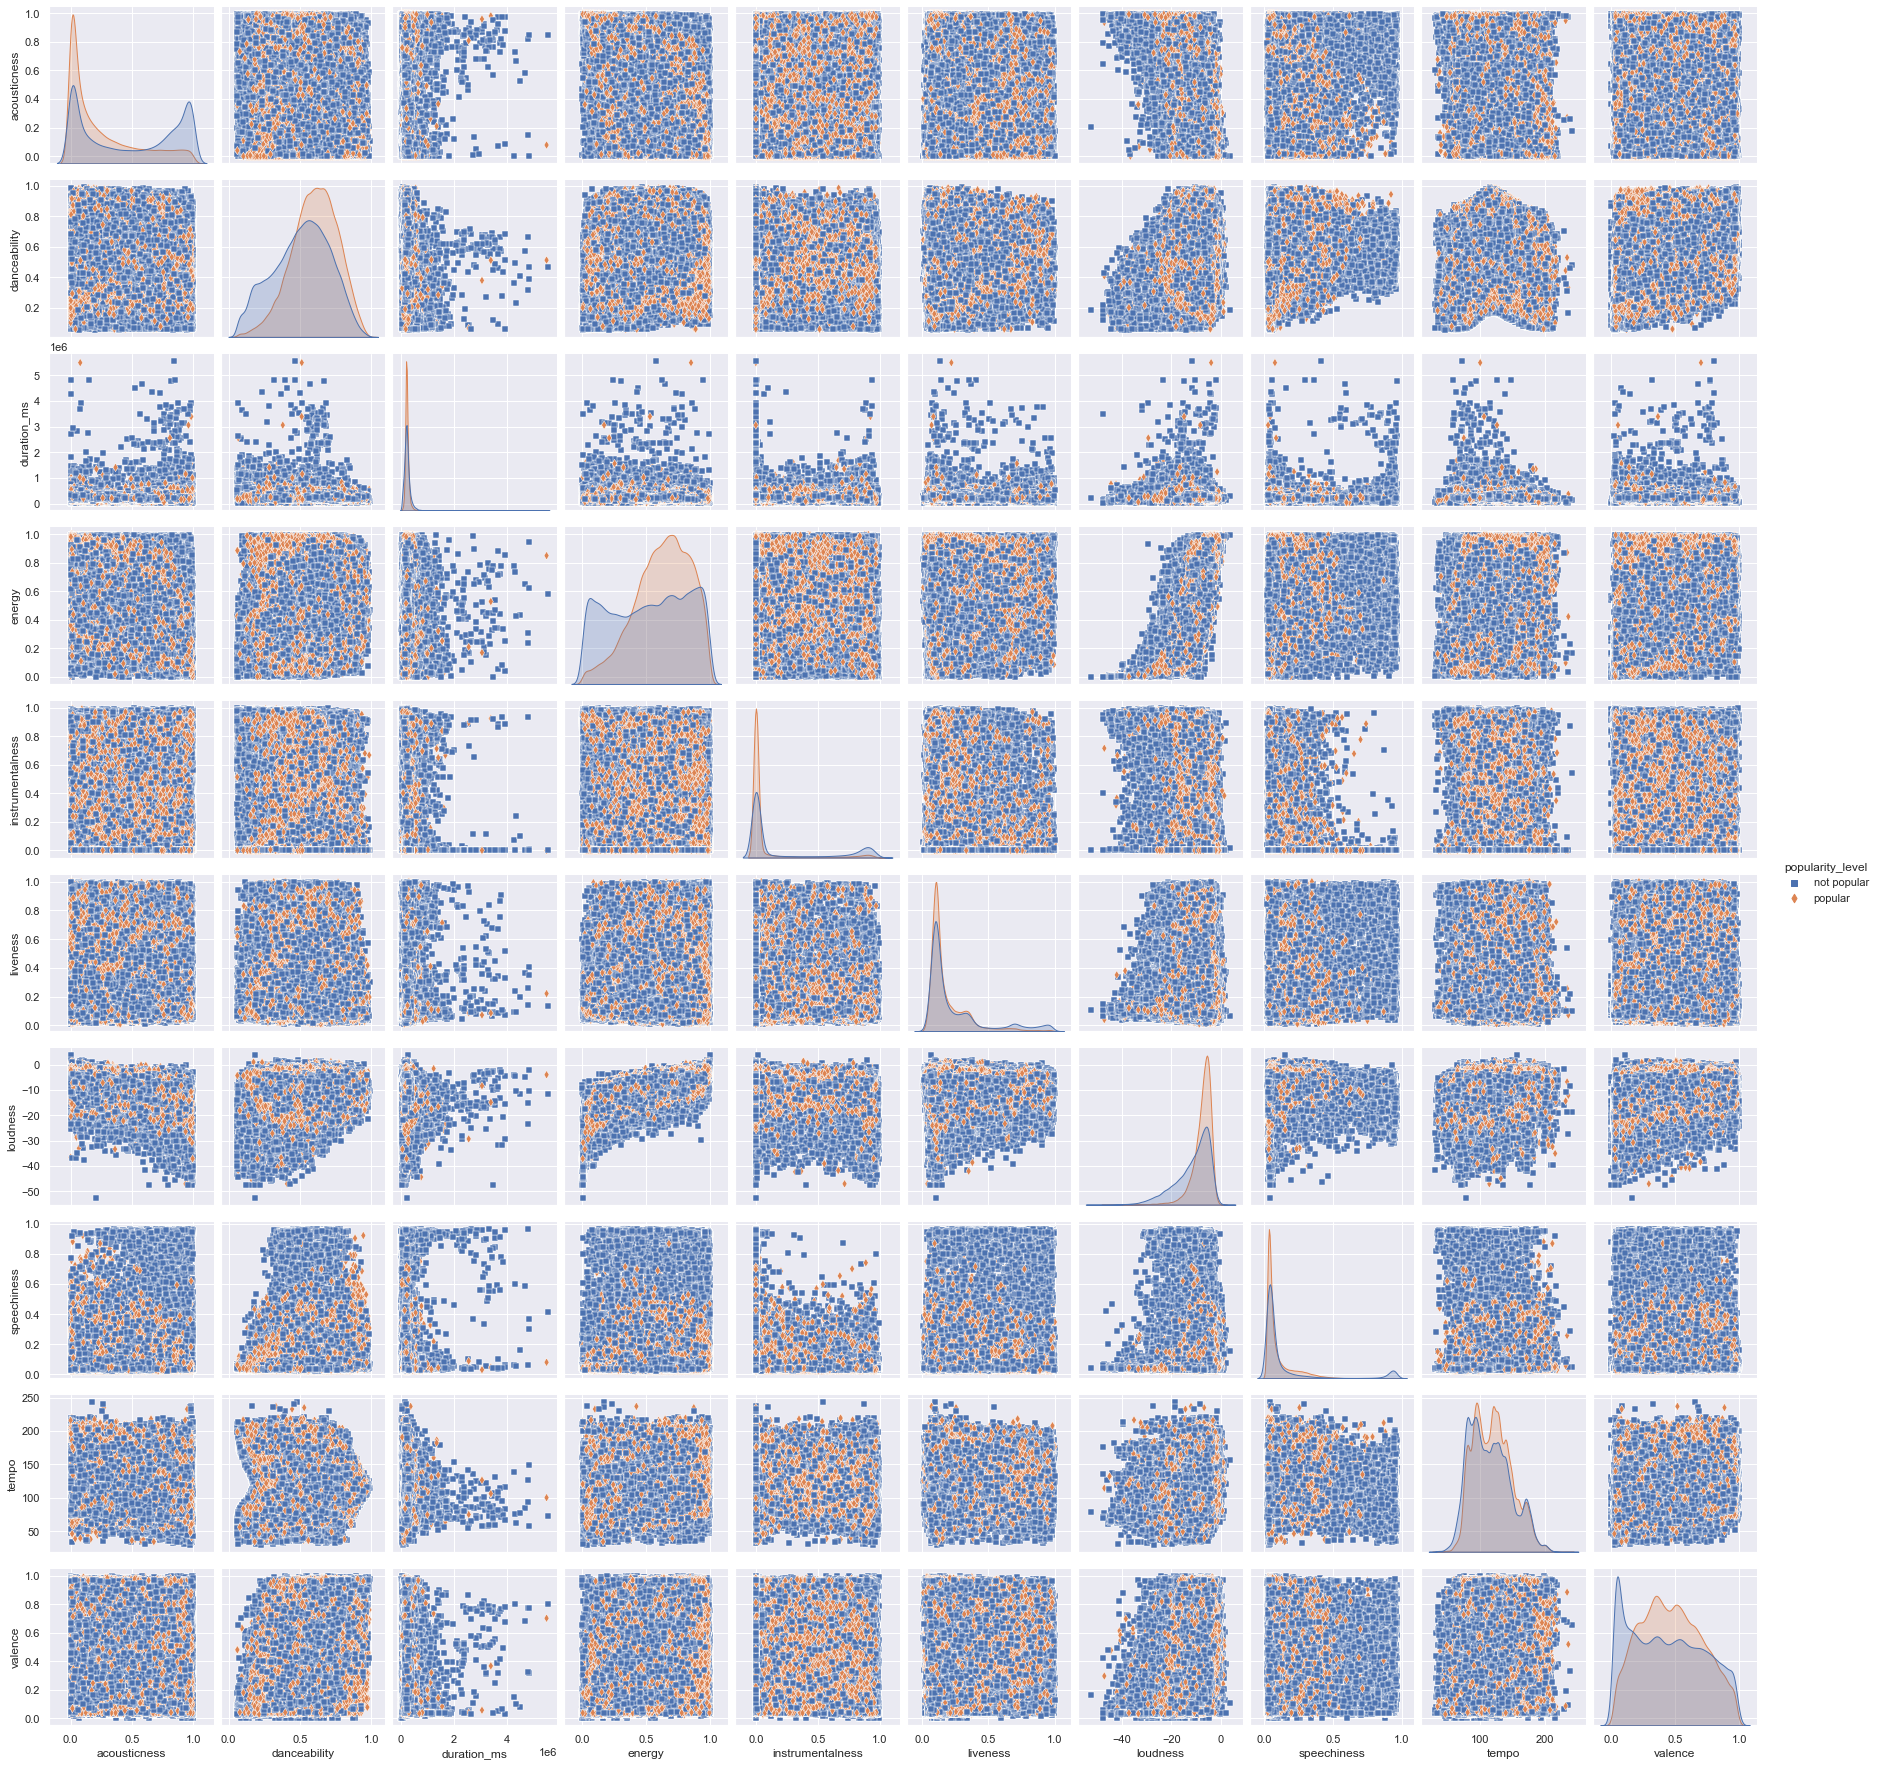

In [25]:
sns.pairplot(data=spotify, vars=['acousticness','danceability','duration_ms','energy','instrumentalness','liveness',
                                 'loudness','speechiness','tempo','valence'],
            hue= 'popularity_level',
            markers=["s", "d"] )


In [26]:
from sklearn import preprocessing

key_encoder = preprocessing.LabelEncoder()
spotify["key"] = key_encoder.fit_transform(spotify["key"])


mode_encoder = preprocessing.LabelEncoder()
spotify["mode"] = mode_encoder.fit_transform(spotify["mode"])

time_signature_encoder= preprocessing.LabelEncoder()
spotify["time_signature"] = mode_encoder.fit_transform(spotify["time_signature"])

spotify.head()


genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0        99373   0.910             0.000    4    0.3460    -1.828     0   
1       137373   0.737             0.000    9    0.1510    -5.559     1   
2       170267   0.131             0.000    3    0.1030   -13.879     1   
3       152427   0.326             0.000    4    0.0985   -12.178     0   
4        82625   0.225             0.123    8    0.2020   -21.150     0   

   speechiness    tempo  time_signature  valence popularity_level  
0       0.0525  166.969               3    0.814      not popular  
1       0.0868  174.003               3    0.816      not popular  
2       0.0362   99.488               4    0.368      not popular  
3       0.0395  171.758               3    0.227      not popular  
4       0.0456  140.576               3    0.390      not popular

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [28]:
model = smf.ols( formula='popularity ~ acousticness + danceability + duration_ms + energy + instrumentalness + liveness + loudness + speechiness + tempo +valence ',  data=spotify).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     7106.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:28:50   Log-Likelihood:            -9.7432e+05
No. Observations:              232725   AIC:                         1.949e+06
Df Residuals:                  232714   BIC:                         1.949e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           55.3882      0.344    160.972      0.000      54.714      56.063
acousticness       -11.9349      0.155    -77.133      0.000     -12.238     -11.632
danceability        17.7400      0.242     73.267      0.000      17.265      18.215
duration_ms       2.457e-06   2.82e-07      8.726      0.000    1.91e-06    3.01e-06
energy              -5.6278      0.279    -20.142      0.000      -6.175      -5.080
instrumentalness    -4.3106      0.133    -32.400      0.000      -4.571      -4.050
liveness            -9.6706      0.201    -48.078      0.000     -10.065      -9.276
loudness             0.7151      0.011     63.499      0.000       0.693       0.737
speechiness         -8.1082      0.230    -35.275      0.000      -8.559      -7.658
tempo               -0.0043      0.001     -3.824      0.000      -0.006      -0.002
valence            -13.2259      0.166    -79.707      0.000     -13.551     -12.901
==============================================================================
Omnibus:                     4217.319   Durbin-Watson:                   0.447
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4446.702
Skew:                          -0.338   Prob(JB):                         0.00
Kurtosis:                       2.947   Cond. No.                     3.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
spotify['popularity_res'] = model.resid

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


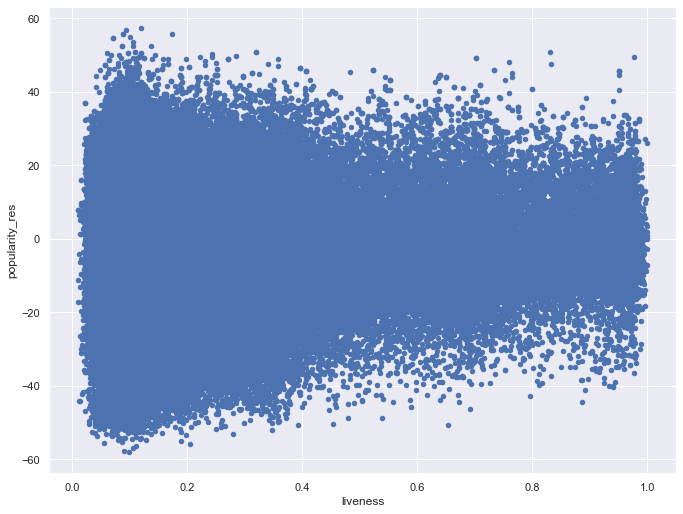

In [30]:
ax2 = spotify.plot.scatter(x='liveness',
                      y='popularity_res')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


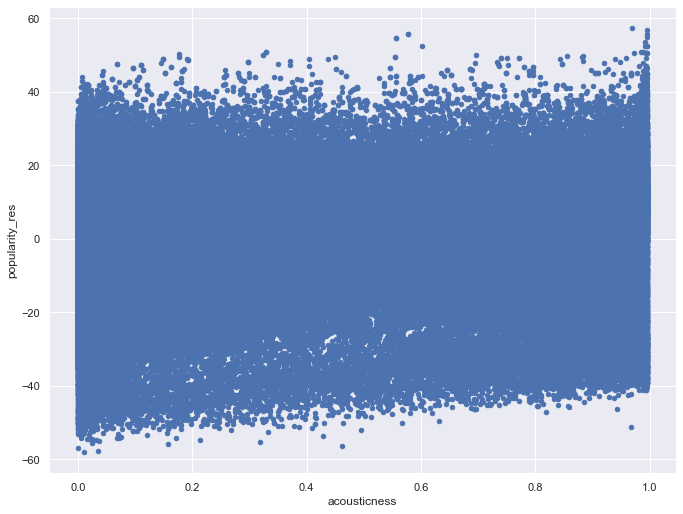

In [31]:
ax1 = spotify.plot.scatter(x='acousticness',
                      y='popularity_res')

## PCA

In [32]:
spotify_norm = spotify.copy()
#spotify_norm =  spotify_norm.drop(['key', 'mode','time_signature','popularity_level','popularity_res'], axis = 1) 
spotify_norm 

genre               artist_name                        track_name  \
0       Movie            Henri Salvador       C'est beau de faire un Show   
1       Movie         Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2       Movie           Joseph Williams    Don't Let Me Be Lonely Tonight   
3       Movie            Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4       Movie              Fabien Nataf                         Ouverture   
...       ...                       ...                               ...   
232720   Soul                     Slave                      Son Of Slide   
232721   Soul  Jr Thomas & The Volcanos                      Burning Fire   
232722   Soul              Muddy Waters    (I'm Your) Hoochie Coochie Man   
232723   Soul                   R.LUM.R                     With My Words   
232724   Soul            Mint Condition    You Don't Have To Hurt No More   

                      track_id  popularity  acousticness  danceability  \
0       0BRjO6ga9RKCKjfDqeFgWV           0       0.61100         0.389   
1       0BjC1NfoEOOusryehmNudP           1       0.24600         0.590   
2       0CoSDzoNIKCRs124s9uTVy           3       0.95200         0.663   
3       0Gc6TVm52BwZD07Ki6tIvf           0       0.70300         0.240   
4       0IuslXpMROHdEPvSl1fTQK           4       0.95000         0.331   
...                        ...         ...           ...           ...   
232720  2XGLdVl7lGeq8ksM6Al7jT          39       0.00384         0.687   
232721  1qWZdkBl4UVPj9lK6HuuFM          38       0.03290         0.785   
232722  2ziWXUmQLrXTiYjCg2fZ2t          47       0.90100         0.517   
232723  6EFsue2YbIG4Qkq8Zr9Rir          44       0.26200         0.745   
232724  34XO9RwPMKjbvRry54QzWn          35       0.09730         0.758   

        duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
0             99373   0.910          0.000000    4    0.3460    -1.828     0   
1            137373   0.737          0.000000    9    0.1510    -5.559     1   
2            170267   0.131          0.000000    3    0.1030   -13.879     1   
3            152427   0.326          0.000000    4    0.0985   -12.178     0   
4             82625   0.225          0.123000    8    0.2020   -21.150     0   
...             ...     ...               ...  ...       ...       ...   ...   
232720       326240   0.714          0.544000    5    0.0845   -10.626     0   
232721       282447   0.683          0.000880    7    0.2370    -6.944     1   
232722       166960   0.419          0.000000    5    0.0945    -8.282     0   
232723       222442   0.704          0.000000    0    0.3330    -7.137     0   
232724       323027   0.470          0.000049   11    0.0836    -6.708     1   

        speechiness    tempo  time_signature  valence popularity_level  \
0            0.0525  166.969               3    0.814      not popular   
1            0.0868  174.003               3    0.816      not popular   
2            0.0362   99.488               4    0.368      not popular   
3            0.0395  171.758               3    0.227      not popular   
4            0.0456  140.576               3    0.390      not popular   
...             ...      ...             ...      ...              ...   
232720       0.0316  115.542               3    0.962      not popular   
232721       0.0337  113.830               3    0.969      not popular   
232722       0.1480   84.135               3    0.813          popular   
232723       0.1460  100.031               3    0.489          popular   
232724       0.0287  113.897               3    0.479      not popular   

        popularity_res  
0           -33.561131  
1           -40.433167  
2           -35.962022  
3           -36.077583  
4           -21.121968  
...                ...  
232720       -1.078795  
232721       -6.934467  
232722       14.290045  
232723       -1.659251  
232724      -18.162058  

[232725 rows x 20 columns]

In [33]:
import sklearn.preprocessing as skp

In [34]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']
#x = spotify_norm.loc[:, features].values

spotify_norm.loc[:,features] = skp.scale(spotify_norm.loc[:,features].astype(np.float))
spotify_norm.head()

/Users/csy/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0      0.683376     -0.890935   
1  0BjC1NfoEOOusryehmNudP           1     -0.345467      0.191994   
2  0CoSDzoNIKCRs124s9uTVy           3      1.644570      0.585296   
3  0Gc6TVm52BwZD07Ki6tIvf           0      0.942701     -1.693703   
4  0IuslXpMROHdEPvSl1fTQK           4      1.638932     -1.203422   

   duration_ms    energy  instrumentalness  key  liveness  loudness  mode  \
0    -1.141368  1.286908         -0.489819    4  0.660661  1.290703     0   
1    -0.821867  0.630249         -0.489819    9 -0.322835  0.668683     1   
2    -0.545298 -1.669954         -0.489819    3 -0.564927 -0.718402     1   
3    -0.695295 -0.929789         -0.489819    4 -0.587623 -0.434817     0   
4    -1.282184 -1.313157         -0.083566    8 -0.065613 -1.930601     0   

   speechiness     tempo  time_signature   valence popularity_level  \
0    -0.367970  1.595607               3  1.380744      not popular   
1    -0.183082  1.823253               3  1.388435      not popular   
2    -0.455832 -0.588326               4 -0.334212      not popular   
3    -0.438044  1.750597               3 -0.876384      not popular   
4    -0.405163  0.741433               3 -0.249618      not popular   

   popularity_res  
0      -33.561131  
1      -40.433167  
2      -35.962022  
3      -36.077583  
4      -21.121968

In [35]:
spotify_norm.describe()

popularity  acousticness  danceability   duration_ms        energy  \
count  232725.000000  2.327250e+05  2.327250e+05  2.327250e+05  2.327250e+05   
mean       41.127502  1.658467e-16 -4.885029e-17 -2.516553e-17  2.735616e-17   
std        18.189948  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min         0.000000 -1.038880e+00 -2.680191e+00 -1.847514e+00 -2.167115e+00   
25%        29.000000 -9.328945e-01 -6.431004e-01 -4.394421e-01 -7.058423e-01   
50%        43.000000 -3.849297e-01  8.962731e-02 -1.235571e-01  1.292150e-01   
75%        55.000000  9.962575e-01  7.415395e-01  2.576659e-01  8.200350e-01   
max       100.000000  1.768595e+00  2.341688e+00  4.471153e+01  1.624727e+00   

       instrumentalness            key      liveness      loudness  \
count      2.327250e+05  232725.000000  2.327250e+05  2.327250e+05   
mean       5.568933e-17       5.344467 -2.796679e-16 -9.647932e-17   
std        1.000002e+00       3.461641  1.000002e+00  1.000002e+00   
min       -4.898185e-01       0.000000 -1.035644e+00 -7.150008e+00   
25%       -4.898185e-01       3.000000 -5.931709e-01 -3.669631e-01   
50%       -4.896722e-01       5.000000 -4.388376e-01  3.014051e-01   
75%       -3.715761e-01       8.000000  2.470882e-01  6.783521e-01   
max        2.809741e+00      11.000000  3.959158e+00  2.219650e+00   

                mode   speechiness         tempo  time_signature  \
count  232725.000000  2.327250e+05  2.327250e+05   232725.000000   
mean        0.347969 -8.646501e-17 -5.485888e-16        2.896388   
std         0.476327  1.000002e+00  1.000002e+00        0.400637   
min         0.000000 -5.312965e-01 -2.824947e+00        0.000000   
25%         0.000000 -4.531369e-01 -7.996282e-01        3.000000   
50%         0.000000 -3.809067e-01 -6.112155e-02        3.000000   
75%         1.000000 -8.497840e-02  6.921753e-01        3.000000   
max         1.000000  4.561473e+00  4.053111e+00        4.000000   

            valence  popularity_res  
count  2.327250e+05    2.327250e+05  
mean   4.323251e-16   -1.202046e-09  
std    1.000002e+00    1.592076e+01  
min   -1.749243e+00   -5.803366e+01  
25%   -8.379325e-01   -1.021468e+01  
50%   -4.197743e-02    1.412686e+00  
75%    7.885844e-01    1.105836e+01  
max    2.095950e+00    5.736798e+01

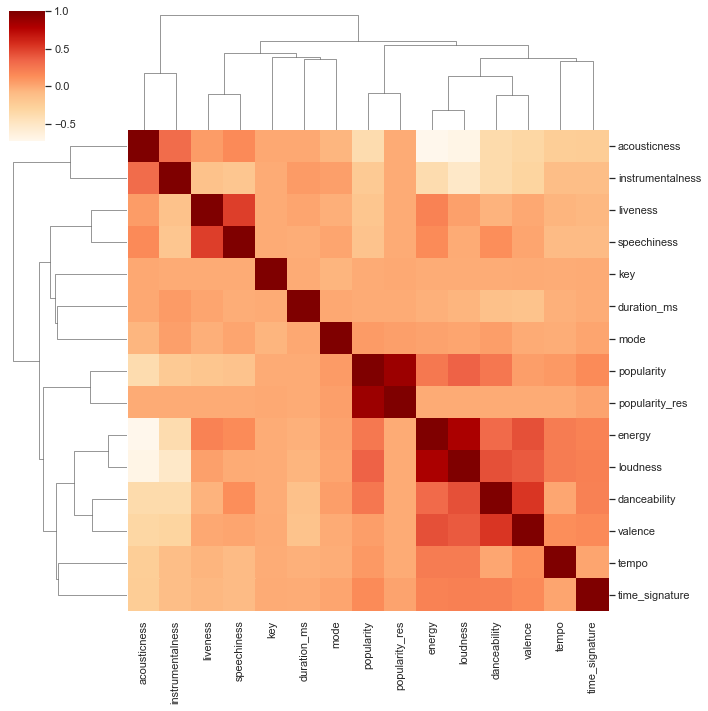

In [36]:
sns.clustermap(spotify_norm.corr(),cmap=plt.cm.OrRd)

In [37]:
#sns.pairplot(spotify_norm)

In [38]:
import sklearn.decomposition as skd

features = ['acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']
x = spotify_norm.loc[:, features].values
pca_model = skd.PCA().fit(x)

Text(0.5, 1.0, 'PCA')

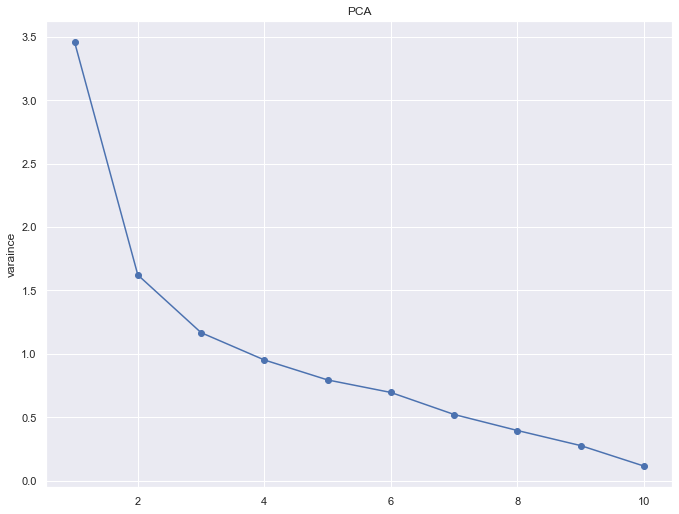

In [39]:
plt.plot(range(1,11),pca_model.explained_variance_,'b-o')
plt.ylabel('varaince')
plt.title('PCA')

In [40]:
pca = skd.PCA(n_components=4)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4'])

In [41]:
finalDf = pd.concat([principalDf, spotify[['popularity']]], axis = 1)

In [42]:
model2 = smf.ols( formula='popularity ~ pc1 + pc2+ pc3 +pc4', data = finalDf).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                 1.198e+04
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:28:53   Log-Likelihood:            -9.8354e+05
No. Observations:              232725   AIC:                         1.967e+06
Df Residuals:                  232720   BIC:                         1.967e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.1275      0.034   1197.801      0.000      41.060      41.195
pc1           -3.2720      0.018   -177.231      0.000      -3.308      -3.236
pc2           -3.1277      0.027   -116.013      0.000      -3.181      -3.075
pc3            0.6337      0.032     19.939      0.000       0.571       0.696
pc4            1.8160      0.035     51.604      0.000       1.747       1.885
==============================================================================
Omnibus:                     5003.381   Durbin-Watson:                   0.335
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5305.311
Skew:                          -0.366   Prob(JB):                         0.00
Kurtosis:                       2.894   Cond. No.                         1.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
finalDf.isnull().value_counts()

pc1    pc2    pc3    pc4    popularity
False  False  False  False  False         232725
dtype: int64

## Question3:  k-means Clustering

In [44]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
spotify2= spotify.sample(frac = 0.1)
spotify2.shape

(23272, 20)

In [46]:
df_kfeature= spotify2[['popularity','acousticness','danceability','duration_ms','energy','instrumentalness',
                      'liveness','loudness','speechiness','tempo','valence'
      ]]


In [47]:
data =df_kfeature.copy()

In [48]:
import sklearn.metrics as metrics

In [49]:
cost = []
for k in range(2,10):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(data)
    cost.append(metrics.silhouette_score(data, k_means.labels_))


Text(0.5, 1.0, 'Silhouette Score')

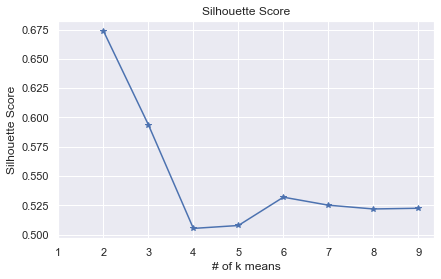

In [50]:
# kIdx = np.argmax(cost)
fig, ax = plt.subplots()
plt.plot(range(2,10), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])
plt.ylabel('Silhouette Score')
plt.xlabel('# of k means')
plt.title('Silhouette Score')

In [51]:
kmeans = KMeans(n_clusters=2) # start with 3 clusters
kmeans.fit(df_kfeature)
print("Labels:")
print(kmeans.labels_)


Labels:
[1 1 0 ... 1 1 1]


In [52]:
data_joined = pd.concat([pd.DataFrame(kmeans.labels_).reset_index(),df_kfeature.reset_index()],axis=1).drop('index',axis=1)

data_joined.head()

0  popularity  acousticness  danceability  duration_ms  energy  \
0  1          47      0.000186         0.530       186360   0.981   
1  1          71      0.010300         0.863       202640   0.457   
2  0          31      0.689000         0.699       361400   0.523   
3  1          73      0.694000         0.595       232240   0.419   
4  1          20      0.509000         0.212       319553   0.343   

   instrumentalness  liveness  loudness  speechiness    tempo  valence  
0          0.032500    0.1130    -4.400       0.1620  102.614    0.427  
1          0.000053    0.1090    -6.422       0.0526  115.009    0.401  
2          0.805000    0.1020    -7.613       0.0490  136.025    0.190  
3          0.000000    0.1200    -8.122       0.2760  120.140    0.330  
4          0.986000    0.0802   -11.749       0.0337  158.878    0.152

In [53]:
data_joined.rename(columns={0: "clusters"}, inplace=True)
data_joined['clusters'].value_counts()

1    20793
0     2479
Name: clusters, dtype: int64

/Users/csy/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/csy/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/Users/csy/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simila

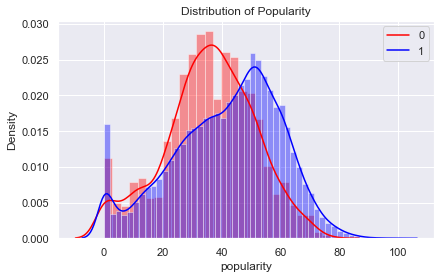

In [54]:
plt.title('Distribution of Popularity')
# sns.distplot(ltv['ltv'])
fig = plt.subplot()
sns.distplot(data_joined[data_joined['clusters']==0]['popularity'],color ='red')
sns.distplot(data_joined[data_joined['clusters']==1]['popularity'],color ='blue')
#sns.distplot(data_joined[data_joined['clusters']==2]['data_joined'],color ='green')    
fig.legend(labels=['0','1'])
plt.show()

/Users/csy/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/csy/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/Users/csy/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simila

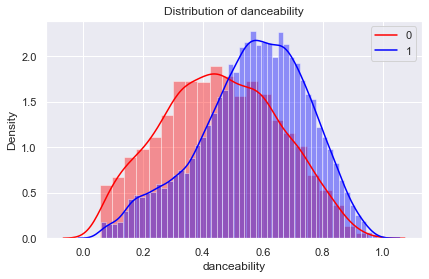

In [56]:
plt.title('Distribution of danceability')
# sns.distplot(ltv['ltv'])
fig = plt.subplot()
sns.distplot(data_joined[data_joined['clusters']==0]['danceability'],color ='red')
sns.distplot(data_joined[data_joined['clusters']==1]['danceability'],color ='blue')
#sns.distplot(data_joined[data_joined['clusters']==2]['data_joined'],color ='green')    
fig.legend(labels=['0','1'])
plt.show()

/Users/csy/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/csy/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/Users/csy/Library/Python/3.7/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simila

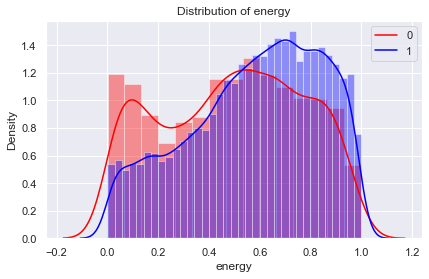

In [59]:
plt.title('Distribution of energy')
# sns.distplot(ltv['ltv'])
fig = plt.subplot()
sns.distplot(data_joined[data_joined['clusters']==0]['energy'],color ='red')
sns.distplot(data_joined[data_joined['clusters']==1]['energy'],color ='blue')
#sns.distplot(data_joined[data_joined['clusters']==2]['data_joined'],color ='green')    
fig.legend(labels=['0','1'])
plt.show()